## Example plots
Here we show some example plots that can be made with timeseries data and differential expression analysis of that data

In [9]:
# Imports
import pandas as pd
from pydiffexp import DEAnalysis, volcano_plot, tsplot
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Load the data
test_path = "/Users/jfinkle/Documents/Northwestern/MoDyLS/Python/sprouty/data/raw_data/all_data_formatted.csv"
raw_data = pd.read_csv(test_path, index_col=0)

Here's a look at the data. 

In [11]:
raw_data.head()

,WT_1_0_A,WT_2_0_B,WT_3_0_C,WT_4_15_A,WT_5_15_B,WT_6_15_C,WT_7_60_A,WT_8_60_B,WT_9_60_C,WT_10_120_A,...,KO_22_60_A,KO_23_60_B,KO_24_60_C,KO_25_120_A,KO_26_120_B,KO_27_120_C,KO_28_240_A,KO_29_240_B,KO_30_240_C,KO_32_0_D
TargetID,,,,,,,,,,,,,,,,,,,,,
0610006I08RIK,244.6,234.3,272.2,280.4,236.0,263.2,224.0,271.0,246.6,265.9,...,142.9,170.1,143.9,156.8,169.1,171.1,174.1,157.5,162.1,174.6
0610007C21RIK,1259.9,1269.9,1450.2,1363.3,1307.2,1406.4,1222.9,1283.8,1197.2,1385.5,...,1646.7,1728.6,1495.5,1815.2,1871.5,1847.7,1367.5,1545.0,1383.0,1695.7
0610007P08RIK,29.0,23.5,26.1,27.6,23.5,26.1,22.5,23.0,17.7,13.4,...,18.0,21.2,18.7,24.2,53.1,7.5,25.0,22.6,16.5,14.2
0610007P14RIK,607.5,540.0,589.6,643.7,724.6,638.9,437.6,409.3,545.6,561.7,...,1245.0,1477.0,1310.1,1827.0,1928.7,1697.4,1399.4,1675.5,1269.6,1856.9
0610007P22RIK,529.4,564.8,646.0,490.9,553.9,577.6,481.7,556.6,449.6,590.8,...,356.2,304.5,319.8,402.7,439.3,408.4,450.5,459.3,409.4,427.5


In this example the column labels include all the experiment information. We can extract that by specifiying a heirarchy. We'll also do microarray background correction while we're at it. The background has already been subtracted so anything negative is "meaningless"

In [12]:
hierarchy = ['condition', 'well', 'time', 'replicate']
raw_data[raw_data <= 0] = 1

Now we just make our fit object, specify the contrast we want to look at and do the fit! We'll take a look at some of the results of the fit

In [18]:
dea = DEAnalysis(raw_data, index_names=hierarchy, reference_labels=['condition', 'time'])
c_string = "KO_0-WT_0"
dea.fit(c_string)
dea.results.head()

,logFC,AveExpr,t,pval,adj_pval,B,-log10p
PTN,9.494964,4.728120,150.377573,8.647337e-36,1.568454e-31,60.488854,30.804528
IGFBP7,7.095179,8.116964,58.855698,1.721438e-26,1.561172e-22,48.804411,21.806549
REPIN1,5.566773,2.708824,55.377563,6.877096e-26,4.157892e-22,47.721864,21.381127
DCN,-3.500038,11.313522,-53.341784,1.610666e-25,6.592131e-22,47.040785,21.180974
BICC1,6.808397,3.364110,52.647519,2.168878e-25,6.592131e-22,46.799900,21.180974


To get a sense of the differential expression overall we can make a volcano plot. Notice that we can specify how we want to select the top genes. If multiple criteria are chosen, the union of the top_n of each criteria are colored.

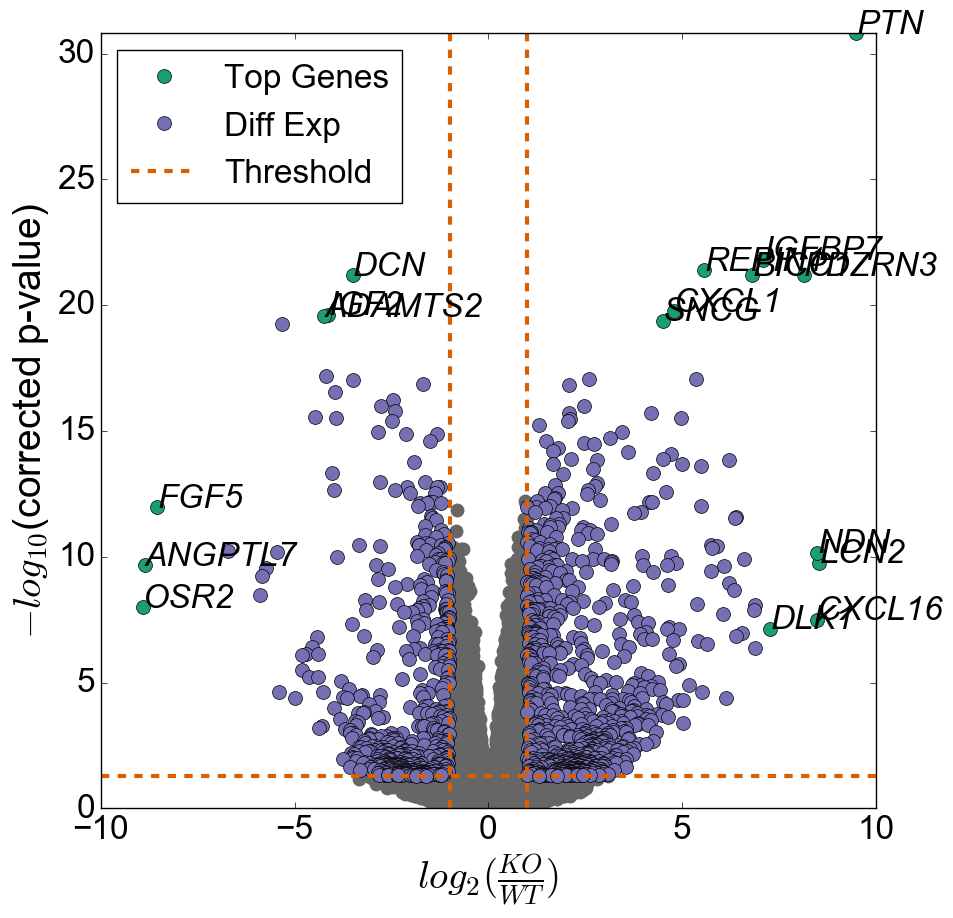

In [14]:
volcano_plot(dea.results, top_n=10, top_by=['logFC', '-log10p'], show_labels=True)

If we want to look at the raw data time series we can also plot that. A typical view would be a plot of the timeseries of each condition. Here we plot the mean and SEM at each timepoint. For Angptl4 there is a large and significant divergence by the end of the timecourse, while for Zik1 there isn't much difference at any point.

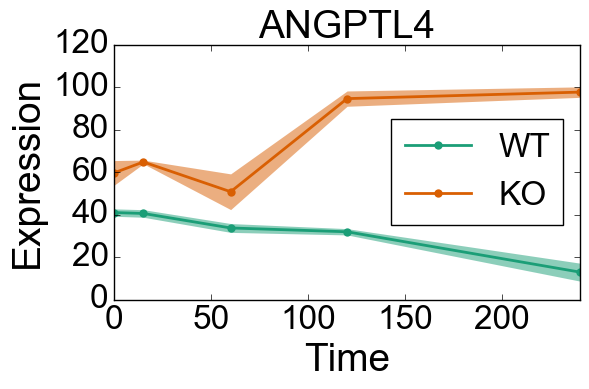

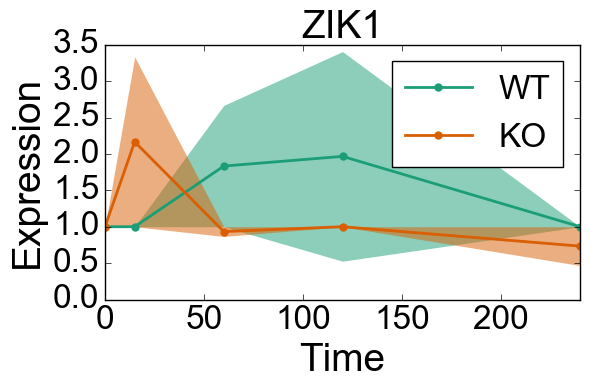

In [19]:
data = dea.data.loc['ANGPTL4']
tsplot(data)

data = dea.data.loc['ZIK1']
tsplot(data)